In [ ]:
# Author: Brandon Botzer
# Date: 1/21/2024
# Class: Penn State - AI 879

Ex 3.12:
Sharpening, blur, and noise removal. 

Implement some softening, sharpening, and
non-linear diffusion (selective sharpening or noise removal) filters, such as Gaussian, median,
and bilateral (Section 3.3.1), as discussed in Section 3.4.2.

Take blurry or noisy images (shooting in low light is a good way to get both) and try to
improve their appearance and legibility.

In [2]:
# Common Imports

import skimage as ski
import numpy as np
import matplotlib.pyplot as plt


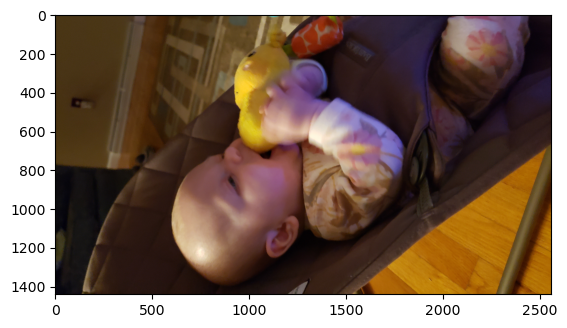

In [3]:
# Origional image
viv = ski.io.imread('Vivi.jpg')
plt.imshow(viv)

Notice the bluring of the hand.  I'll try to improve on this as well as the image as a whole.

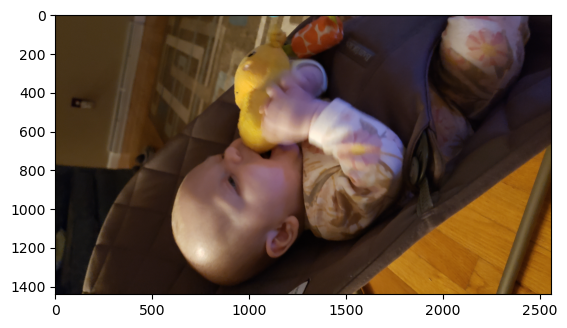

In [4]:
# Gaussian Filter
viv_gauss = ski.filters.gaussian(viv, sigma=0.5)
plt.imshow(viv_gauss)

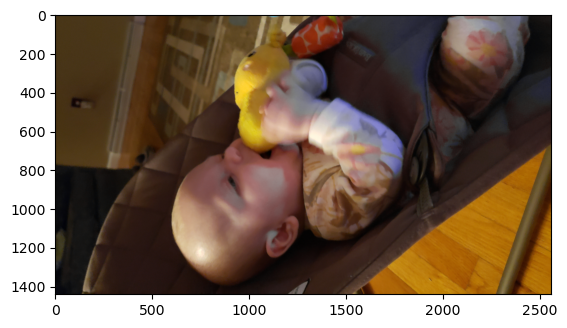

In [5]:
# Median filter
viv_median = ski.filters.median(viv)
plt.imshow(viv_median)

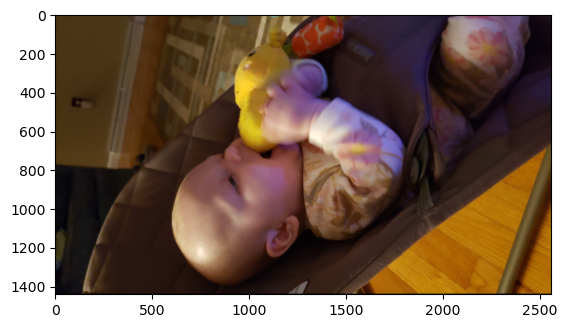

In [6]:
# Denoise the image using a bilateral filter
viv_bilat = ski.restoration.denoise_bilateral(viv, sigma_spatial=0.5, channel_axis=-1)
plt.imshow(viv_bilat)

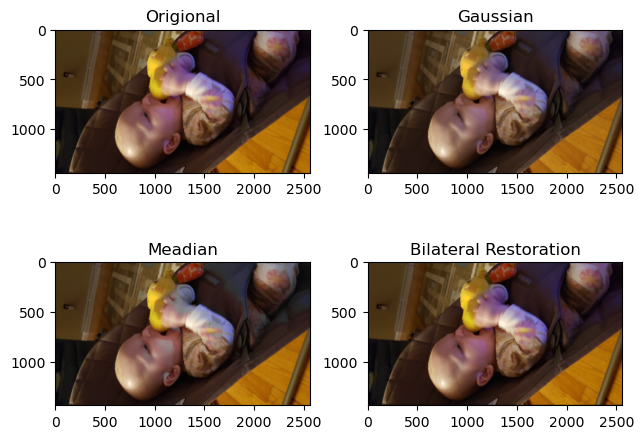

In [7]:
fig, ax = plt.subplots(2,2)
plt.tight_layout()


ax[0,0].set_title('Origional')
ax[0,0].imshow(viv)

ax[0,1].set_title('Gaussian')
ax[0,1].imshow(viv_gauss)

ax[1,0].set_title('Meadian')
ax[1,0].imshow(viv_median)

ax[1,1].set_title('Bilateral Restoration')
ax[1,1].imshow(viv_bilat)


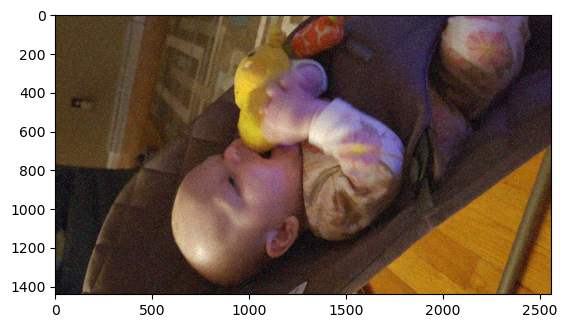

In [9]:
# Create a noisy version of Viv using salt and pepper

sp_viv = ski.util.random_noise(viv, mode='s&p', amount=0.1)
plt.imshow(sp_viv)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


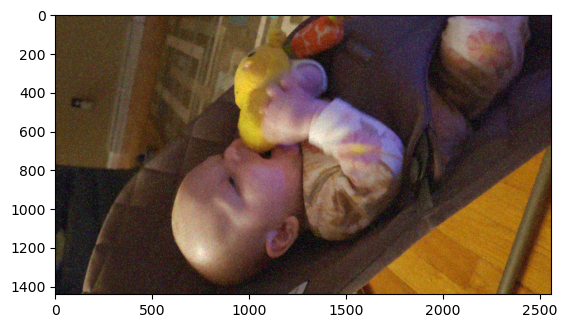

In [10]:
# Attempt to use total variation functions on a noisy (Salt and Pepper) version of Viv
# https://scikit-image.org/docs/stable/api/skimage.restoration.html#skimage.restoration.denoise_tv_chambolle

viv_tv_chambolle = ski.restoration.denoise_tv_chambolle(sp_viv, channel_axis=-1)
plt.imshow(viv_tv_chambolle)

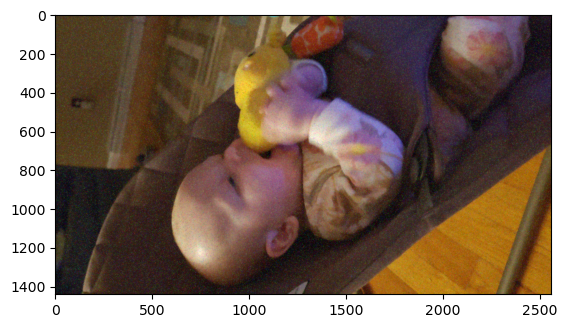

In [11]:
# Attempt to use total variation functions on a noisy (Salt and Pepper) version of Viv
# https://scikit-image.org/docs/stable/api/skimage.restoration.html#skimage.restoration.denoise_tv_bregman
viv_tv_bregman = ski.restoration.denoise_tv_bregman(sp_viv, channel_axis=-1)
plt.imshow(viv_tv_bregman)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


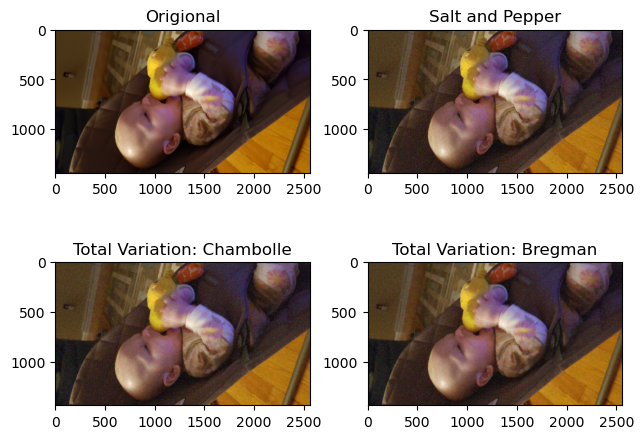

In [17]:
# plot viv, s&p, tv_bregman, tv_chambolle
fig, ax = plt.subplots(2,2)
plt.tight_layout()


ax[0,0].set_title('Origional')
ax[0,0].imshow(viv)

ax[0,1].set_title('Salt and Pepper')
ax[0,1].imshow(sp_viv)

ax[1,0].set_title('Total Variation: Chambolle')
ax[1,0].imshow(viv_tv_chambolle)

ax[1,1].set_title('Total Variation: Bregman')
ax[1,1].imshow(viv_tv_bregman)

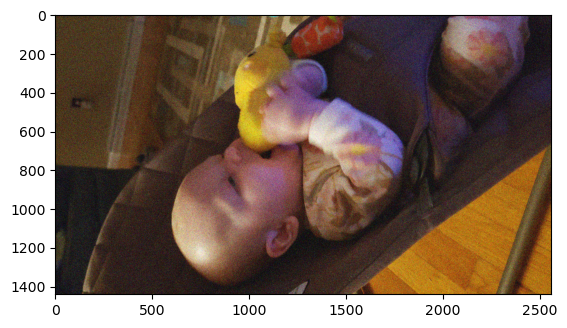

In [13]:
# Running the same but with a gaussian noised image

gauss_viv = ski.util.random_noise(viv, mode='gaussian', var=0.0324) # gives a sigma of 0.18
plt.imshow(gauss_viv)

In [14]:
# I'll estimage the sigma of the gaussian noised image

est_sigma = np.mean(ski.restoration.estimate_sigma(gauss_viv, channel_axis=-1))
print(f'Estimated Sigma of Gaussian Noised image: {est_sigma:.4}')

Estimated Sigma of Gaussian Noised image: 0.1503


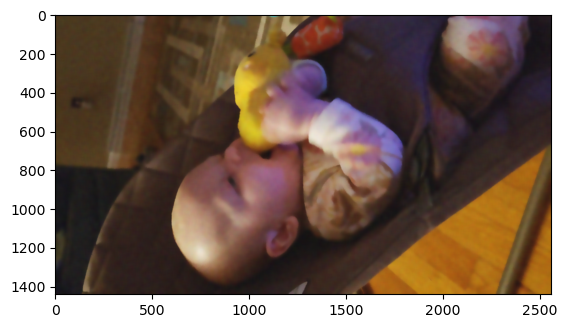

In [15]:
# Run the non-local means restoration filter
#  Set h to be slightly less than the estimated sigma
#  Assign sigma to the estimated sigma value
viv_nl_means = ski.restoration.denoise_nl_means(gauss_viv, h = 0.9*est_sigma, sigma=est_sigma, channel_axis=-1)
plt.imshow(viv_nl_means)

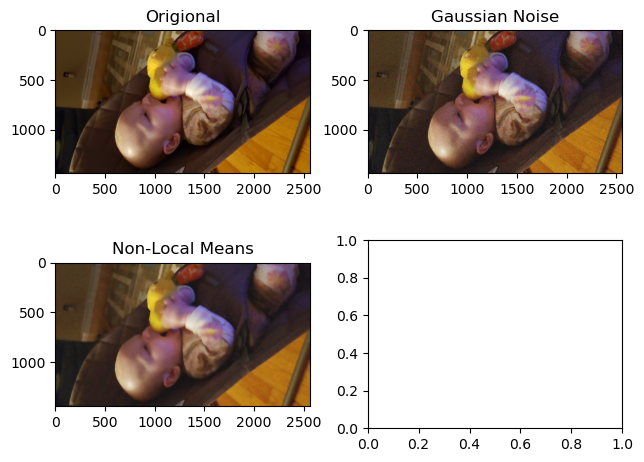

In [55]:
# plot viv, gauss, nl_means

fig, ax = plt.subplots(2,2)
plt.tight_layout()


ax[0,0].set_title('Origional')
ax[0,0].imshow(viv)

ax[0,1].set_title('Gaussian Noise')
ax[0,1].imshow(gauss_viv)

ax[1,0].set_title('Non-Local Means')
ax[1,0].imshow(viv_nl_means)



# Structural Similarity (SSIM) Metrics

## On the Gaussian Noised Image

In [70]:
# All of the various noised and filtered images are floats images with shape [x,y,ch] and x/y values that range from 0 to 1.
#  The origional Viv image must be rescaled from [0,255] to [0,1]
#  Failing to do this will give spurious results with everything having a SSIM of 0.0275

viv_float = ski.util.img_as_float64(viv)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Mean SSIM: 0.049640209207732676


Text(0.5, 1.0, 'Blue Grad')

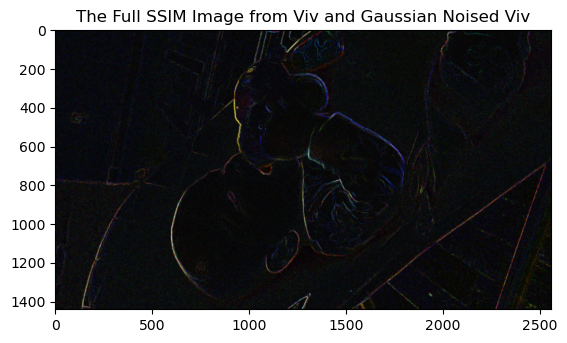

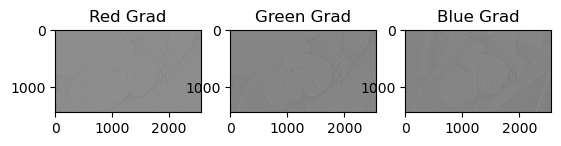

In [72]:
# Structural Similarity Computation to compare the some images

# Origional Image vs. Gaussian Noised Image (to act as a baseline to what the SSIM score would be on just the noised data)

# Returns the metric, the gradient of the structural similarity, and the full SSIM image
mssim, grad, s = ski.metrics.structural_similarity(viv_float, gauss_viv, data_range=gauss_viv.max()-gauss_viv.min(), channel_axis=-1, gradient=True, full=True)

# Display Results
print(f'The Mean SSIM: {mssim}')
plt.imshow(s)
plt.title('The Full SSIM Image from Viv and Gaussian Noised Viv')

# Pull the gradient from each color channel
red = grad[:,:,0]
green = grad[:,:,1]
blue = grad[:,:,2]

# Plot the color channel grads
fig, ax = plt.subplots(1,3)

# Show the R G B image lumances making sure to use the gray cmap
ax[0].imshow(red, cmap='gray')
ax[0].set_title('Red Grad')
ax[1].imshow(green, cmap='gray')
ax[1].set_title('Green Grad')
ax[2].imshow(blue, cmap='gray')
ax[2].set_title('Blue Grad')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Mean SSIM: 0.8386261146216746


Text(0.5, 1.0, 'Blue Grad')

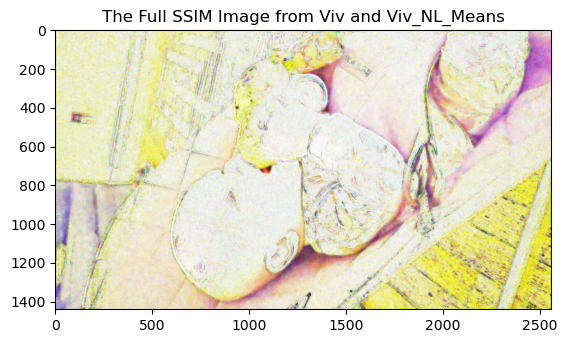

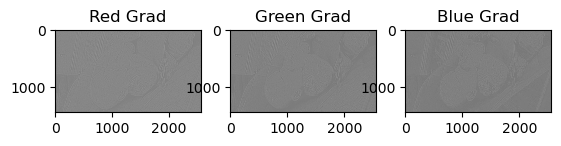

In [73]:
# Structural Similarity Computation to compare the some images

# Origional Image vs. Non-Local Means (from Gaussian noise)
# Returns the metric, the gradient of the structural similarity, and the full SSIM image
mssim, grad, s = ski.metrics.structural_similarity(viv_float, viv_nl_means, data_range=viv_nl_means.max()-viv_nl_means.min(), channel_axis=-1, gradient=True, full=True)

# Display Results
print(f'The Mean SSIM: {mssim}')
plt.imshow(s)
plt.title('The Full SSIM Image from Viv and Viv_NL_Means')

# Pull the gradient from each color channel
red = grad[:,:,0]
green = grad[:,:,1]
blue = grad[:,:,2]

# Plot the color channel grads
fig, ax = plt.subplots(1,3)

# Show the R G B image lumances making sure to use the gray cmap
ax[0].imshow(red, cmap='gray')
ax[0].set_title('Red Grad')
ax[1].imshow(green, cmap='gray')
ax[1].set_title('Green Grad')
ax[2].imshow(blue, cmap='gray')
ax[2].set_title('Blue Grad')



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Mean SSIM: 0.060057079750647314


Text(0.5, 1.0, 'Blue Grad')

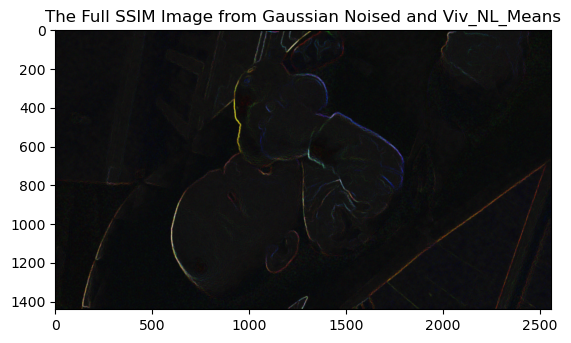

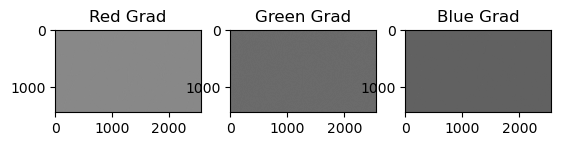

In [74]:
# Structural Similarity Computation to compare the some images

# Gaussian Noised Image vs. Non-Local Means (from Gaussian noise)
#    I am predicting these to be very similar since the NL_Means was run on the gauss_viv noised image

# Returns the metric, the gradient of the structural similarity, and the full SSIM image
mssim, grad, s = ski.metrics.structural_similarity(gauss_viv, viv_nl_means, data_range=viv_nl_means.max()-viv_nl_means.min(), channel_axis=-1, gradient=True, full=True)

# Display Results
print(f'The Mean SSIM: {mssim}')
plt.imshow(s)
plt.title('The Full SSIM Image from Gaussian Noised and Viv_NL_Means')

# Pull the gradient from each color channel
red = grad[:,:,0]
green = grad[:,:,1]
blue = grad[:,:,2]

# Plot the color channel grads
fig, ax = plt.subplots(1,3)

# Show the R G B image lumances making sure to use the gray cmap
ax[0].imshow(red, cmap='gray')
ax[0].set_title('Red Grad')
ax[1].imshow(green, cmap='gray')
ax[1].set_title('Green Grad')
ax[2].imshow(blue, cmap='gray')
ax[2].set_title('Blue Grad')

It appears that the NL Means method made very few structural changes to the gaussian noised image.

## On the Salt and Pepper Noised Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Mean SSIM: 0.07913152149246318


Text(0.5, 1.0, 'Blue Grad')

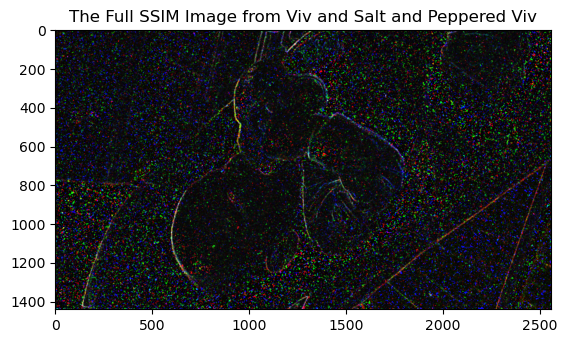

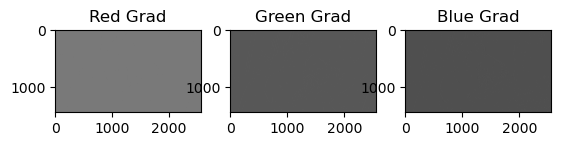

In [78]:
# Origional Image vs. Total Variation Bregman (from Salt and Pepper Noise)

# Returns the metric, the gradient of the structural similarity, and the full SSIM image
mssim, grad, s = ski.metrics.structural_similarity(viv_float, sp_viv, data_range=sp_viv.max()-sp_viv.min(), channel_axis=-1, gradient=True, full=True)

# Display Results
print(f'The Mean SSIM: {mssim}')
plt.imshow(s)
plt.title('The Full SSIM Image from Viv and Salt and Peppered Viv')

# Pull the gradient from each color channel
red = grad[:,:,0]
green = grad[:,:,1]
blue = grad[:,:,2]

# Plot the color channel grads
fig, ax = plt.subplots(1,3)

# Show the R G B image lumances making sure to use the gray cmap
ax[0].imshow(red, cmap='gray')
ax[0].set_title('Red Grad')
ax[1].imshow(green, cmap='gray')
ax[1].set_title('Green Grad')
ax[2].imshow(blue, cmap='gray')
ax[2].set_title('Blue Grad')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Mean SSIM: 0.2682088550917316


Text(0.5, 1.0, 'Blue Grad')

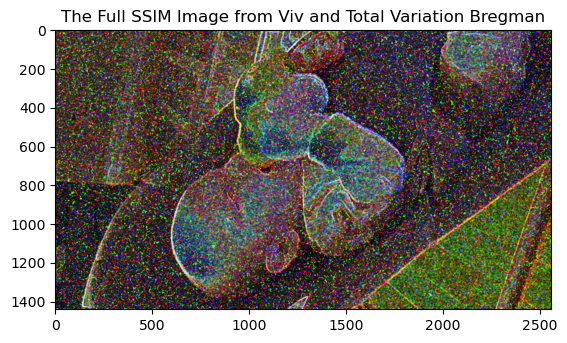

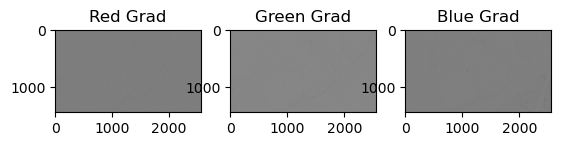

In [79]:
# Origional Image vs. Total Variation Bregman (from Salt and Pepper Noise)

# Returns the metric, the gradient of the structural similarity, and the full SSIM image
mssim, grad, s = ski.metrics.structural_similarity(viv_float, viv_tv_bregman, data_range=viv_tv_bregman.max()-viv_tv_bregman.min(), channel_axis=-1, gradient=True, full=True)

# Display Results
print(f'The Mean SSIM: {mssim}')
plt.imshow(s)
plt.title('The Full SSIM Image from Viv and Total Variation Bregman')

# Pull the gradient from each color channel
red = grad[:,:,0]
green = grad[:,:,1]
blue = grad[:,:,2]

# Plot the color channel grads
fig, ax = plt.subplots(1,3)

# Show the R G B image lumances making sure to use the gray cmap
ax[0].imshow(red, cmap='gray')
ax[0].set_title('Red Grad')
ax[1].imshow(green, cmap='gray')
ax[1].set_title('Green Grad')
ax[2].imshow(blue, cmap='gray')
ax[2].set_title('Blue Grad')

While all methods helped, the Non-Local Means method clearly performed the best in removing noise.  This should be no surprise in that the NL-Means method used the estimated gaussian to remove the gaussian noise in the image.

I would predict that if the estimated gaussian was closer, or if I just provided the gaussian, then it would perform even better.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Mean SSIM: 0.840229200469646


Text(0.5, 1.0, 'Blue Grad')

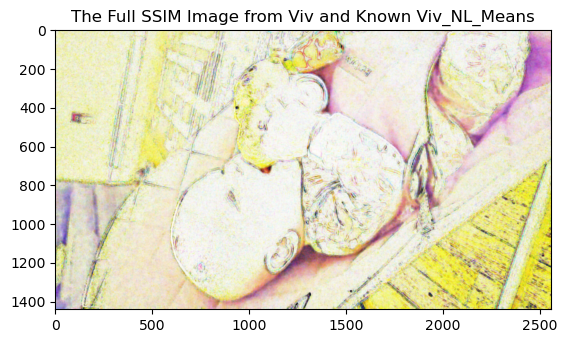

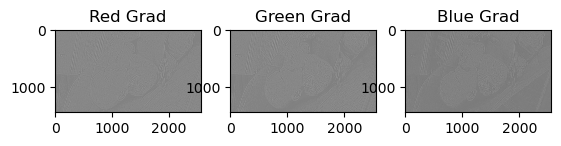

In [81]:
# Another NL-means with known gaussian

# Recalculate the NL-Means but using the known sigma value of 0.18
viv_nl_means_known = ski.restoration.denoise_nl_means(gauss_viv, h = 0.9*0.18, sigma=0.18, channel_axis=-1)

# Structural Similarity Computation to compare the some images

# Origional Image vs. Non-Local Means (from Gaussian noise)
# Returns the metric, the gradient of the structural similarity, and the full SSIM image
mssim, grad, s = ski.metrics.structural_similarity(viv_float, viv_nl_means_known, data_range=viv_nl_means_known.max()-viv_nl_means_known.min(), channel_axis=-1, gradient=True, full=True)

# Display Results
print(f'The Mean SSIM: {mssim}')
plt.imshow(s)
plt.title('The Full SSIM Image from Viv and Known Viv_NL_Means')

# Pull the gradient from each color channel
red = grad[:,:,0]
green = grad[:,:,1]
blue = grad[:,:,2]

# Plot the color channel grads
fig, ax = plt.subplots(1,3)

# Show the R G B image lumances making sure to use the gray cmap
ax[0].imshow(red, cmap='gray')
ax[0].set_title('Red Grad')
ax[1].imshow(green, cmap='gray')
ax[1].set_title('Green Grad')
ax[2].imshow(blue, cmap='gray')
ax[2].set_title('Blue Grad')

There was an increase in SSIM by 0.01.  An improvement, but not by much.